<a href="https://colab.research.google.com/github/randeep-pv/Knn-Pojects/blob/main/knn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data
import numpy as np
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# head 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#tail
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# column name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking missing value 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#input
x=df.iloc[:,:-1].values   # .values used to convert dataframe into array
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#output
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
#dimension of x (input should be 2 dimension and output should be 1 dimension)
x.ndim

2

In [ ]:
#dimension of y
y.ndim

1

In [ ]:
# training and testing data spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [ ]:
#input training data
x_train

array([[1.00e+00, 1.11e+02, 9.40e+01, ..., 3.28e+01, 2.65e-01, 4.50e+01],
       [3.00e+00, 1.32e+02, 8.00e+01, ..., 3.44e+01, 4.02e-01, 4.40e+01],
       [5.00e+00, 9.60e+01, 7.40e+01, ..., 3.36e+01, 9.97e-01, 4.30e+01],
       ...,
       [3.00e+00, 1.25e+02, 5.80e+01, ..., 3.16e+01, 1.51e-01, 2.40e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       [8.00e+00, 1.96e+02, 7.60e+01, ..., 3.75e+01, 6.05e-01, 5.70e+01]])

In [ ]:
#input testing data
x_test

array([[  8.   , 124.   ,  76.   , ...,  28.7  ,   0.687,  52.   ],
       [  1.   , 118.   ,  58.   , ...,  33.3  ,   0.261,  23.   ],
       [  2.   , 129.   ,  74.   , ...,  33.2  ,   0.591,  25.   ],
       ...,
       [  1.   , 199.   ,  76.   , ...,  42.9  ,   1.394,  22.   ],
       [  4.   , 115.   ,  72.   , ...,  28.9  ,   0.376,  46.   ],
       [  5.   ,  97.   ,  76.   , ...,  35.6  ,   0.378,  52.   ]])

In [ ]:
# output training data  
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
# output testing data
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# Normalization
# To set all column values into same range we use normalization
# 3 normalization method
#1. standard scalar
#2. min max scalar
#3. normalization method

#standard scalar
# equation: z=(x-u)/s

# x=data of column
# y= mean of training datas of columns
# s=standard deviation of column
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train) # to correct dimension
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [ ]:
# normalized input training data
x_train

array([[-0.83122501, -0.29879647,  1.2639406 , ...,  0.13389055,
        -0.64511607,  0.97104915],
       [-0.22924547,  0.35790354,  0.56897202, ...,  0.3359256 ,
        -0.22279033,  0.88690305],
       [ 0.37273407, -0.7678679 ,  0.27112834, ...,  0.23490807,
         1.6113981 ,  0.80275695],
       ...,
       [-0.22924547,  0.13900354, -0.52312147, ..., -0.01763574,
        -0.99654041, -0.79601899],
       [-0.53023524,  0.04518925,  0.07256589, ...,  0.63897818,
        -0.41391585, -0.54358069],
       [ 1.27570339,  2.359275  ,  0.37040956, ...,  0.72736851,
         0.4029916 ,  1.98080238]])

In [ ]:
# normalized input testing data
x_test

array([[ 1.14414516,  0.0726556 ,  0.32294706, ..., -0.50055086,
         0.6375378 ,  1.68654587],
       [-0.87780317, -0.11556994, -0.71961029, ...,  0.09280628,
        -0.59309274, -0.8517985 ],
       [-0.58895341,  0.22951022,  0.20710735, ...,  0.07990722,
         0.36021261, -0.67674026],
       ...,
       [-0.87780317,  2.42547487,  0.32294706, ...,  1.33111686,
         2.67992229, -0.93932761],
       [-0.01125389, -0.20968271,  0.09126765, ..., -0.47475273,
        -0.26088027,  1.16137117],
       [ 0.27759587, -0.77435934,  0.32294706, ...,  0.38948486,
        -0.25510266,  1.68654587]])

In [ ]:
# model creation
from sklearn.neighbors import KNeighborsClassifier                           
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# prediction
y_pred=model.predict(x_test)
y_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# prediction from an input    
print(model.predict([[6,148,72,35,0,33.6,0.627,50]]))

[1]


In [ ]:
# prediction from an input after normalizing  
pred=model.predict(scalar.transform([[6,148,72,35,0,33.6,0.627,50]]))
pred

array([1])

In [ ]:
# performance evaluation  
# confusion matrix: used to evaluate perfomance of a model

# methods
#1.accurancy score

from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
#confusion matrix
result=confusion_matrix(y_test,y_pred)
result

array([[126,  24],
       [ 42,  39]])

In [ ]:
# accuracy score
score=accuracy_score(y_test,y_pred)
score

0.7142857142857143

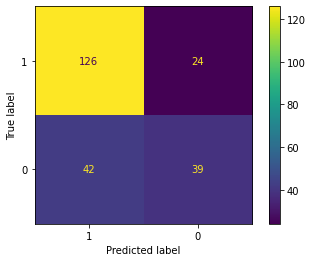

In [ ]:
labels=[1,0]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()